In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src import density_matrix as DM
from src.random_hamiltonian import random_unitary
from src.step import step
from src import measurements

In [2]:
# Properties of the system
number_of_qbits = 6

# initial conditions
initial_pops = np.random.random(number_of_qbits)/2

# how the system will be broken up
number_of_subsystems = 2

assert number_of_qbits // number_of_subsystems == number_of_qbits / number_of_subsystems
subsystem_size = number_of_qbits // number_of_subsystems

In [3]:
# generate the system and change to the energy basis
sys = DM.n_thermal_qbits(initial_pops)
sys.change_to_energy_basis()

In [4]:
def random_grouping(number_of_qbits,number_of_subsystems):
    subsystem_size = number_of_qbits//number_of_subsystems
    grouping = np.arange(number_of_qbits)
    np.random.shuffle(grouping)
    shape = [number_of_subsystems,subsystem_size]
    return grouping.reshape(shape)

In [11]:
pops = [initial_pops]

In [9]:
for _ in range(25):
    print(_)
    
    #generate the unitaries for each subsystem
    U = random_unitary(subsystem_size)
    Unitaries = [U for _ in range(number_of_subsystems)]
    
    
    groups = random_grouping(number_of_qbits,number_of_subsystems)
    sys = step(sys, groups, Unitaries)
    pops.append(measurements.temps(sys))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


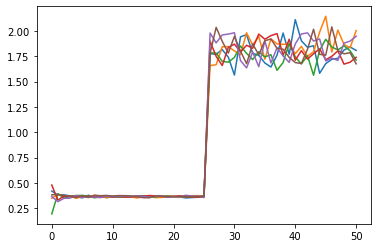

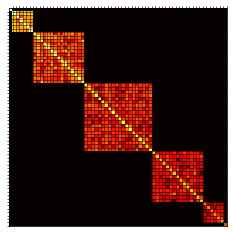

In [10]:
plt.plot(pops)
sys.plot()

In [8]:
sys.ptrace_to_a_single_qbit(2).data_dense

array([[0.62612446-1.23954802e-17j, 0.        +0.00000000e+00j],
       [0.        +0.00000000e+00j, 0.37387554+1.23954802e-17j]])

In [18]:
measurements.extractable_work(1,sys)

AssertionError: 